# Sampling

Content credits on the [Acknowledgments Page](https://ds100.org/sp23/acks/).

Updated by Dominic Liu, Fernando Pérez.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='darkgrid', font_scale = 1.5,
              rc={'figure.figsize':(7,5)})

rng = np.random.default_rng()

## Barbie v. Oppenheimer

We are trying to collect a sample from Berkeley residents to predict the which one of Barbie and Oppenheimer would perform better on their opening day, July 21st.

First, let's grab a dataset that has every single residents in Berkeley (this is a fake dataset) and which movie they **actually** watched on July 21st.

For the purposes of this demo, assume:
* `is_male` indicates if a resident identifies as male.
* There are only two movies they can watch on July 21st: Barbie and Oppenheimer.
* Every resident watches a movie (either Barbie or Oppenheimer) on July 21st.


In [24]:
movie = pd.read_csv("../data/movie.csv")
movie

,age,is_male,movie
0,35,False,Barbie
1,42,True,Oppenheimer
2,55,False,Barbie
3,77,True,Oppenheimer
4,31,False,Barbie
...,...,...,...
1299995,62,True,Barbie
1299996,78,True,Oppenheimer
1299997,68,False,Oppenheimer
1299998,82,True,Oppenheimer


In [25]:
# create a 1/0 int that indicates Barbie vote
movie['barbie'] = (movie['movie'] == 'Barbie').astype(int)
movie

,age,is_male,movie,barbie
0,35,False,Barbie,1
1,42,True,Oppenheimer,0
2,55,False,Barbie,1
3,77,True,Oppenheimer,0
4,31,False,Barbie,1
...,...,...,...,...
1299995,62,True,Barbie,1
1299996,78,True,Oppenheimer,0
1299997,68,False,Oppenheimer,0
1299998,82,True,Oppenheimer,0


What fraction of Berkeley residents chose Barbie?

In [10]:
actual_barbie = movie['barbie'].mean()
actual_barbie

0.5302792307692308

This is the **actual outcome** of the competition. Based on this result, Barbie would win. How did our sample of retirees do?

## Convenience sample: retirees

In [11]:
convenience_sample = movie[movie['age'] >= 65]
np.mean(convenience_sample["barbie"])

0.3744755089093924

Based on this result, we would have predicted that Oppenheimer would win! What happened?

1. Is the sample too small / noisy?

In [12]:
len(convenience_sample)

359396

In [13]:
len(convenience_sample)/len(movie)

0.27645846153846154

Seems really large, so the error is definitely not solely chance error. There is some bias afoot.

### Check for bias

Let us aggregate all choices by age and visualize the fraction of Barbie views, split by gender.

In [29]:
votes_by_barbie = movie.groupby(['age', 'is_male'])['barbie'].mean().to_frame()
votes_by_barbie

barbie
age is_male          
18  False    0.819594
    True     0.667001
19  False    0.812214
    True     0.661252
20  False    0.805281
...               ...
80  True     0.259731
81  False    0.394946
    True     0.256759
82  False    0.398970
    True     0.248060

[130 rows x 1 columns]

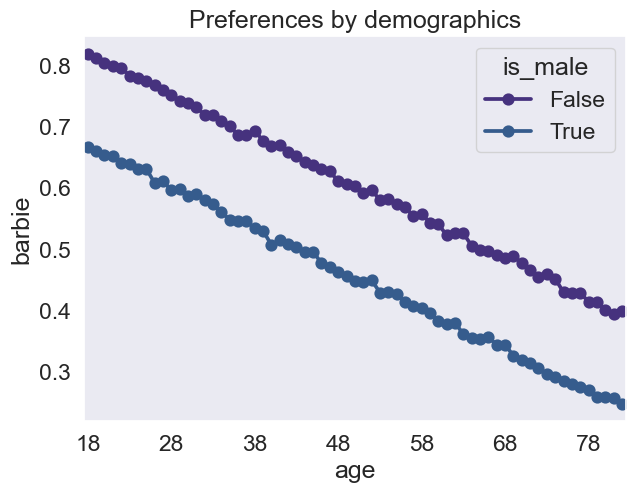

<Figure size 600x300 with 0 Axes>

In [57]:
# A common matplotlib/seaborn pattern: create the figure and axes object, pass ax
# to seaborn for drawing into, and later fine-tune the figure via ax

fig, ax = plt.subplots();

sns.set_style('dark')
sns.set_palette('viridis')
sns.pointplot(
    data = votes_by_barbie,
    x = 'age',
    y = 'barbie',
    hue = 'is_male'
)

plt.figure(figsize=(6, 3))

new_ticks = [i.get_text() for i in ax.get_xticklabels()] 
ax.set_xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_title("Preferences by demographics");

plt.tight_layout()

to extract the x values of ax

In [48]:
for i in ax.get_xticklabels():
    print(i.get_text())

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


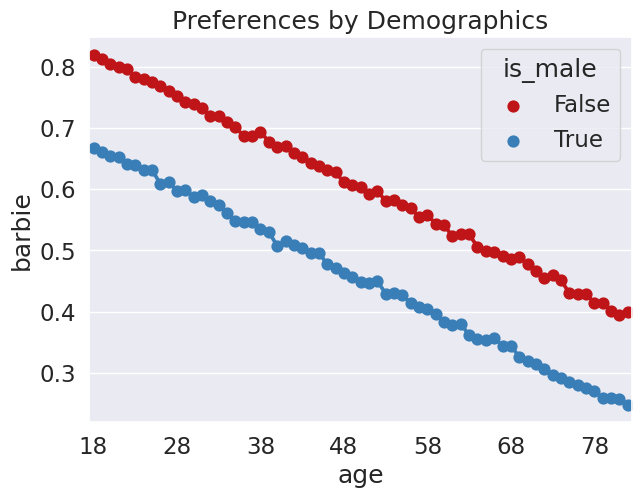

In [8]:
# A common matplotlib/seaborn pattern: create the figure and axes object, pass ax
# to seaborn for drawing into, and later fine-tune the figure via ax.
fig, ax = plt.subplots();

red_blue = ["#bf1518", "#397eb7"]
with sns.color_palette(red_blue):
    sns.pointplot(data=votes_by_barbie, x = "age", y = "barbie", hue = "is_male", ax=ax)

new_ticks = [i.get_text() for i in ax.get_xticklabels()]
ax.set_xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_title("Preferences by Demographics");

* We see that retirees (in Berkeley) tend to watch Oppenheimer.
* We also see that residents who identify as non-male tend to prefer Barbie.

## Simple Random Sample

What if we instead took a simple random sample (SRS) to collect our sample?

Suppose we took an SRS of the same size as our retiree sample:

In [9]:
## By default, replace = False
n = len(convenience_sample)
random_sample = movie.sample(n, replace = False)

np.mean(random_sample["barbie"])

0.5302396242584781

This is very close to the actual vote!

In [10]:
actual_barbie

0.5302792307692308

It turns out that we can get similar results with a **much smaller sample size**, say, 800:

In [11]:
n = 800
random_sample = movie.sample(n, replace = False)

# Compute the sample average and the resulting relative error
sample_barbie = np.mean(random_sample["barbie"])
err = abs(sample_barbie-actual_barbie)/actual_barbie

# We can print output with Markdown formatting too...
from IPython.display import Markdown
Markdown(f"**Actual** = {actual_barbie:.4f}, **Sample** = {sample_barbie:.4f}, "
         f"**Err** = {100*err:.2f}%.")

**Actual** = 0.5303, **Sample** = 0.5112, **Err** = 3.59%.

We'll learn how to choose this number when we (re)learn the Central Limit Theorem later in the semester.

### Quantifying chance error

In our SRS of size 800, what would be our chance error?

Let's simulate 1000 versions of taking the 800-sized SRS from before:

In [59]:
nrep = 1000   # number of simulations
n = 800       # size of our sample
poll_result = []
for i in range(0, nrep):
    random_sample = movie.sample(n, replace = False)
    poll_result.append(np.mean(random_sample["barbie"]))
poll_result

[0.5325,
 0.5175,
 0.53875,
 0.49125,
 0.54625,
 0.54875,
 0.53,
 0.5025,
 0.54625,
 0.525,
 0.54875,
 0.52,
 0.53625,
 0.5075,
 0.56625,
 0.55125,
 0.53875,
 0.535,
 0.54625,
 0.51625,
 0.5325,
 0.52125,
 0.51,
 0.50625,
 0.5325,
 0.49875,
 0.54,
 0.51,
 0.5225,
 0.54625,
 0.535,
 0.53,
 0.56125,
 0.52,
 0.52125,
 0.53,
 0.52,
 0.5025,
 0.5325,
 0.5175,
 0.525,
 0.55625,
 0.52375,
 0.5475,
 0.53875,
 0.55125,
 0.5375,
 0.5125,
 0.54125,
 0.515,
 0.53375,
 0.50875,
 0.555,
 0.53875,
 0.51625,
 0.5425,
 0.52125,
 0.5175,
 0.505,
 0.55375,
 0.51875,
 0.5475,
 0.525,
 0.52125,
 0.51625,
 0.54,
 0.5325,
 0.50625,
 0.5275,
 0.53625,
 0.53375,
 0.54625,
 0.52875,
 0.54625,
 0.52,
 0.54375,
 0.545,
 0.5525,
 0.54375,
 0.52125,
 0.5375,
 0.5175,
 0.52375,
 0.53625,
 0.53,
 0.53,
 0.52,
 0.5425,
 0.5025,
 0.5425,
 0.50625,
 0.55,
 0.4975,
 0.53875,
 0.52375,
 0.52625,
 0.53,
 0.56625,
 0.545,
 0.5625,
 0.54625,
 0.535,
 0.49625,
 0.54375,
 0.54875,
 0.53,
 0.52125,
 0.525,
 0.55125,
 0.55,
 0.5

In [63]:
len(poll_result)

1000

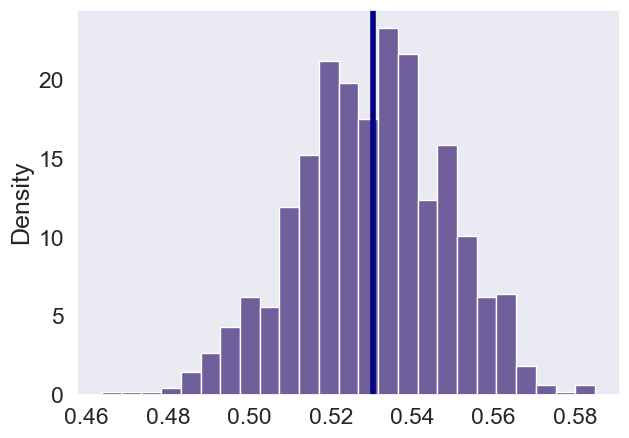

In [70]:
fig, ax = plt.subplots()
sns.histplot(poll_result, stat='density', ax=ax)
ax.axvline(actual_barbie, color="navy", lw=4);

What fraction of these simulated samples would have predicted Barbie?

In [14]:
poll_result = pd.Series(poll_result)
np.sum(poll_result > 0.5)/1000

0.956

You can see the curve looks roughly Gaussian/normal. Using KDE:

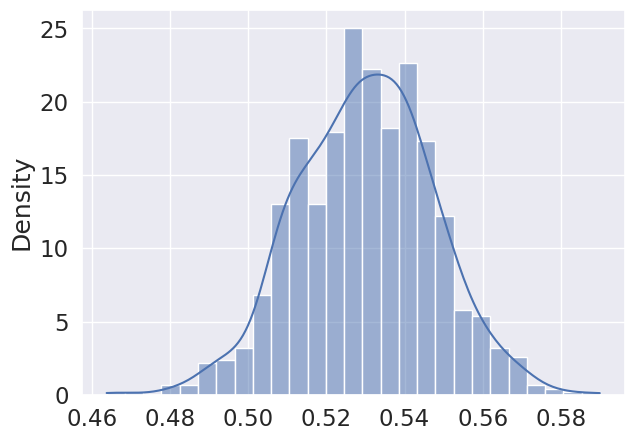

In [15]:
sns.histplot(poll_result, stat='density', kde=True);

---

## Simulating from a Multinomial Distribution

Sometimes instead of having individual reports in the population, we have **aggregate** statistics. For example, we could have only learned that 53\% of election voters voted Democrat. Even so, we can still simulate probability samples if we assume the population is large.

Specifically, we can use **multinomial** probabilities to simulate random samples **with replacement**.

### Marbles

Suppose we have a very large bag of marbles with the following statistics:
* 60\% blue
* 30\% green
* 10\% red

We then draw 100 marbles from this bag at random with replacement.

In [75]:
a = np.random.multinomial(100, [0.60, 0.30, 0.10])
a

array([63, 26, 11])

We can repeat this simulation multiple times, say 20:

In [76]:
np.random.multinomial(100, [0.60, 0.30, 0.10], size=20)

array([[60, 27, 13],
       [61, 31,  8],
       [47, 38, 15],
       [63, 24, 13],
       [58, 33,  9],
       [63, 29,  8],
       [60, 32,  8],
       [58, 31, 11],
       [61, 27, 12],
       [60, 32,  8],
       [61, 29, 10],
       [64, 28,  8],
       [56, 32, 12],
       [53, 40,  7],
       [54, 33, 13],
       [64, 24, 12],
       [58, 30, 12],
       [55, 34, 11],
       [69, 21, 10],
       [59, 34,  7]])